In [1]:
!unzip -qq CVsD.zip

In [2]:
import os, shutil, pathlib

original_dir = pathlib.Path("./dataset/train/")
new_base_dir = pathlib.Path("./cats_vs_dogs_1000")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [5]:
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [7]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [8]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [9]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [10]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [11]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 18s 97ms/step - loss: 0.6978 - accuracy: 0.4925 - val_loss: 0.6930 - val_accuracy: 0.5050
Epoch 2/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6928 - accuracy: 0.5195 - val_loss: 0.6846 - val_accuracy: 0.6330
Epoch 3/30
63/63 [==============================] - 5s 68ms/step - loss: 0.6786 - accuracy: 0.5565 - val_loss: 0.6338 - val_accuracy: 0.6560
Epoch 4/30
63/63 [==============================] - 5s 65ms/step - loss: 0.6697 - accuracy: 0.6025 - val_loss: 0.6371 - val_accuracy: 0.6460
Epoch 5/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6223 - accuracy: 0.6610 - val_loss: 0.6104 - val_accuracy: 0.6690
Epoch 6/30
63/63 [==============================] - 5s 78ms/step - loss: 0.5863 - accuracy: 0.6960 - val_loss: 0.6189 - val_accuracy: 0.6540
Epoch 7/30
63/63 [==============================] - 4s 62ms/step - loss: 0.5535 - accuracy: 0.7220 - val_loss: 0.6245 - val_accuracy: 0.6780
Epoch 8/30
6

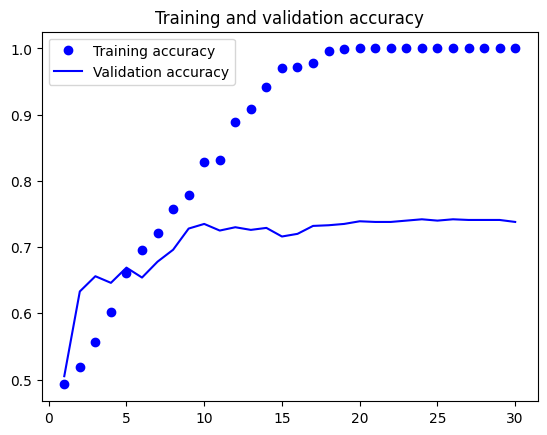

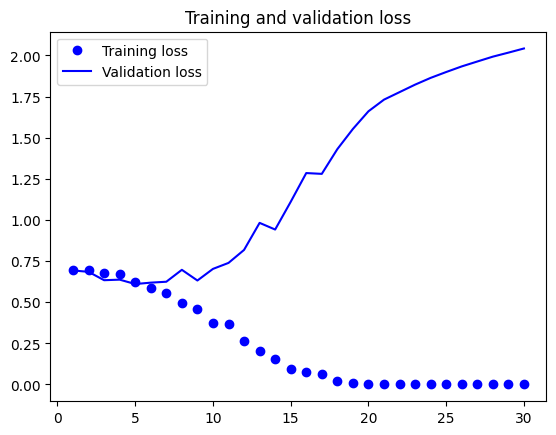

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [14]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.6435 - accuracy: 0.6470
Test accuracy: 0.647


In [15]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

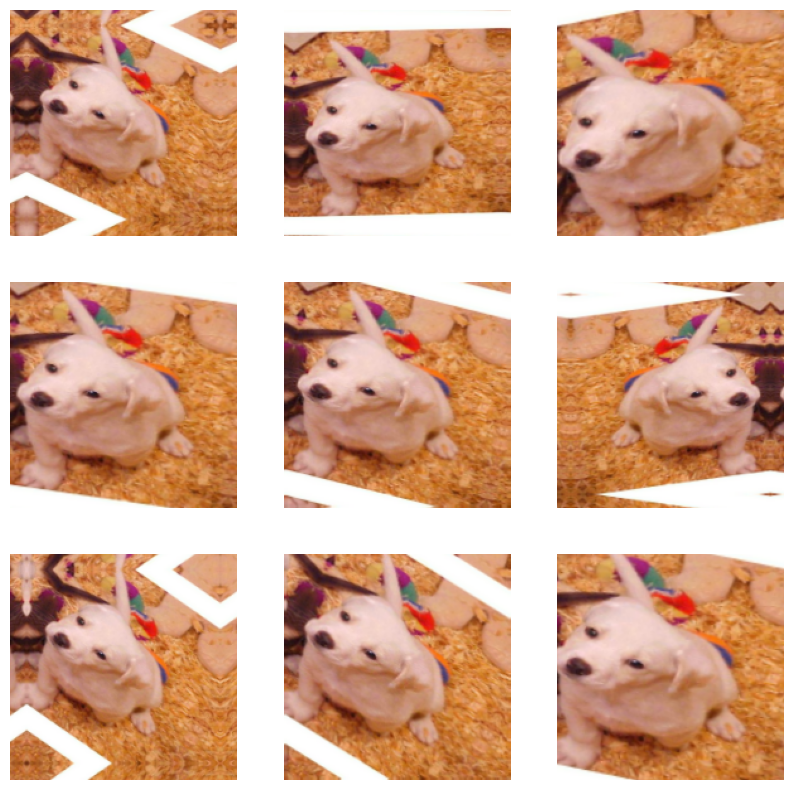

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [17]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [18]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 7s 67ms/step - loss: 0.6946 - accuracy: 0.5175 - val_loss: 0.6918 - val_accuracy: 0.5260
Epoch 2/100
63/63 [==============================] - 4s 64ms/step - loss: 0.6852 - accuracy: 0.5485 - val_loss: 0.6810 - val_accuracy: 0.5900
Epoch 3/100
63/63 [==============================] - 5s 66ms/step - loss: 0.6951 - accuracy: 0.5120 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 4/100
63/63 [==============================] - 4s 64ms/step - loss: 0.6809 - accuracy: 0.5705 - val_loss: 0.6901 - val_accuracy: 0.5230
Epoch 5/100
63/63 [==============================] - 5s 77ms/step - loss: 0.6897 - accuracy: 0.5300 - val_loss: 0.6876 - val_accuracy: 0.5440
Epoch 6/100
63/63 [==============================] - 4s 65ms/step - loss: 0.6712 - accuracy: 0.5855 - val_loss: 0.6790 - val_accuracy: 0.5770
Epoch 7/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6780 - accuracy: 0.5790 - val_loss: 0.6686 - val_accuracy: 0.5990
Epoch 

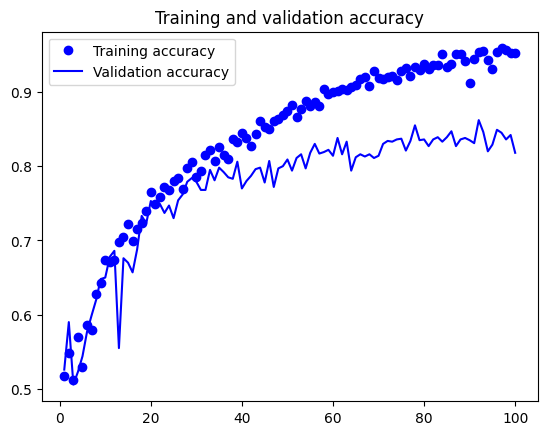

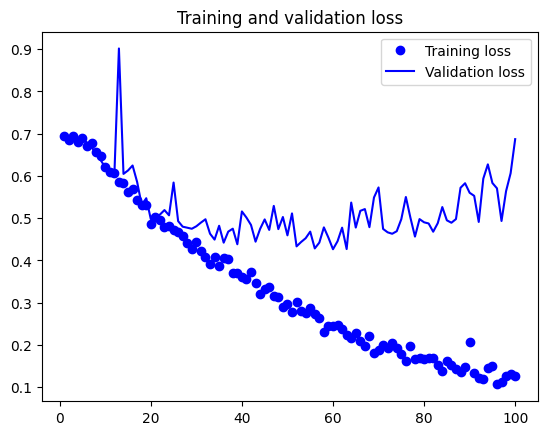

In [19]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [20]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.4847 - accuracy: 0.8090
Test accuracy: 0.809


In [22]:
conv_base = keras.applications.resnet_v2.ResNet152V2( 
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

234545216/234545216 [==============================] - 11s 0us/step


In [23]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.inception_resnet_v2.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 36ms/step


In [24]:
train_features.shape

(2000, 6, 6, 2048)

In [25]:
inputs = keras.Input(shape=(6, 6, 2048))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 4s 36ms/step - loss: 5.0113 - accuracy: 0.9640 - val_loss: 2.9171 - val_accuracy: 0.9800
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 2.2247 - accuracy: 0.9860 - val_loss: 3.0971 - val_accuracy: 0.9790
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 2.5506 - accuracy: 0.9900 - val_loss: 3.3861 - val_accuracy: 0.9830
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.4573 - accuracy: 0.9925 - val_loss: 3.0516 - val_accuracy: 0.9880
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 0.7287 - accuracy: 0.9960 - val_loss: 4.2586 - val_accuracy: 0.9850
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 0.5776 - accuracy: 0.9970 - val_loss: 4.6143 - val_accuracy: 0.9830
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 0.2099 - accuracy: 0.9975 - val_loss: 4.0945 - val_accuracy: 0.9870
Epoch 8/20
63

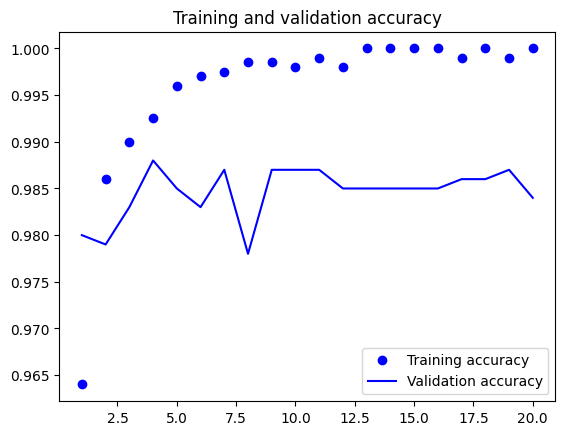

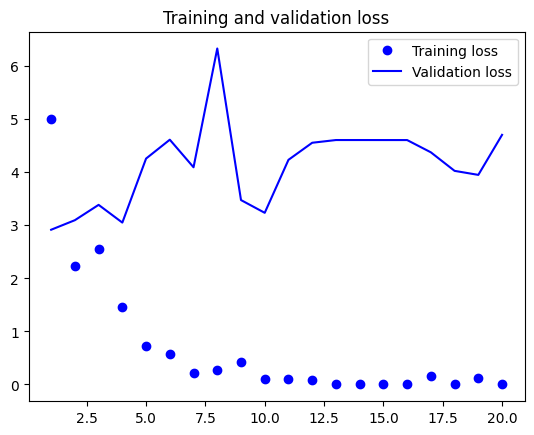

In [26]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [29]:
conv_base  = keras.applications.resnet_v2.ResNet152V2(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [30]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 512


In [31]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [32]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [33]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 30s 326ms/step - loss: 15747.5234 - accuracy: 0.5110 - val_loss: 2152.3149 - val_accuracy: 0.5930
Epoch 2/50
63/63 [==============================] - 16s 249ms/step - loss: 7733.5059 - accuracy: 0.5555 - val_loss: 7922.6665 - val_accuracy: 0.5340
Epoch 3/50
63/63 [==============================] - 16s 253ms/step - loss: 8601.2168 - accuracy: 0.5250 - val_loss: 4238.5044 - val_accuracy: 0.5830
Epoch 4/50
63/63 [==============================] - 16s 254ms/step - loss: 4161.9966 - accuracy: 0.5765 - val_loss: 2354.2390 - val_accuracy: 0.6070
Epoch 5/50
63/63 [==============================] - 16s 257ms/step - loss: 4377.0742 - accuracy: 0.5615 - val_loss: 2800.5310 - val_accuracy: 0.5850
Epoch 6/50
63/63 [==============================] - 16s 257ms/step - loss: 3873.0422 - accuracy: 0.5620 - val_loss: 2952.2854 - val_accuracy: 0.5730
Epoch 7/50
63/63 [==============================] - 18s 291ms/step - loss: 1903.4458 - accuracy: 0.6090 -

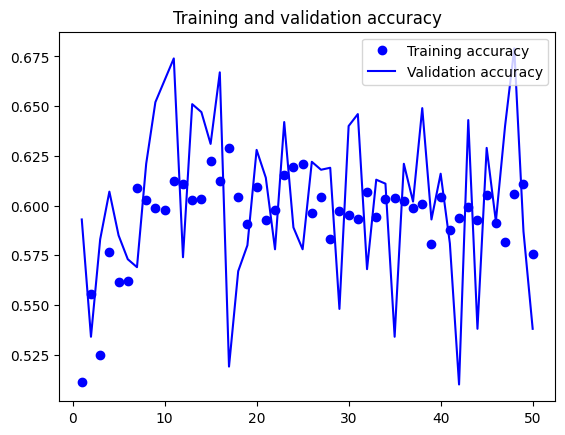

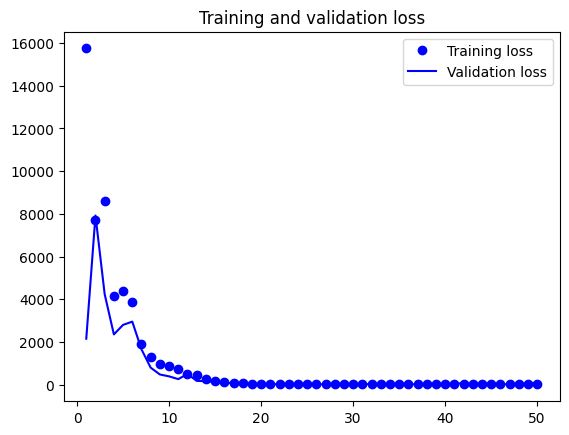

In [34]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [35]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 9s 167ms/step - loss: 9.1374 - accuracy: 0.6420
Test accuracy: 0.642


In [36]:
conv_base.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_7[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                     

In [37]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [38]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


63/63 [==============================] - 38s 421ms/step - loss: 0.8441 - accuracy: 0.5830 - val_loss: 1.4094 - val_accuracy: 0.5100
Epoch 2/30
63/63 [==============================] - 24s 383ms/step - loss: 0.7167 - accuracy: 0.6010 - val_loss: 0.6858 - val_accuracy: 0.6090
Epoch 3/30
63/63 [==============================] - 24s 377ms/step - loss: 0.6731 - accuracy: 0.6275 - val_loss: 0.6497 - val_accuracy: 0.6320
Epoch 4/30
63/63 [==============================] - 17s 272ms/step - loss: 0.6616 - accuracy: 0.6335 - val_loss: 0.6791 - val_accuracy: 0.5810
Epoch 5/30
63/63 [==============================] - 18s 280ms/step - loss: 0.6567 - accuracy: 0.6330 - val_loss: 0.7004 - val_accuracy: 0.6020
Epoch 6/30
63/63 [==============================] - 17s 267ms/step - loss: 0.6637 - accuracy: 0.6245 - val_loss: 0.6560 - val_accuracy: 0.6230
Epoch 7/30
63/63 [==============================] - 17s 264ms/step - loss: 0.6617 - accuracy: 0.6305 - val_loss: 0.8432 - val_accuracy: 0.5810
Epoch 8/30

In [41]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 8s 156ms/step - loss: 0.6315 - accuracy: 0.6350
Test accuracy: 0.635
